# **Басманов Родион Геннадьевич Б81-мм**

Лабораторная работа 3.

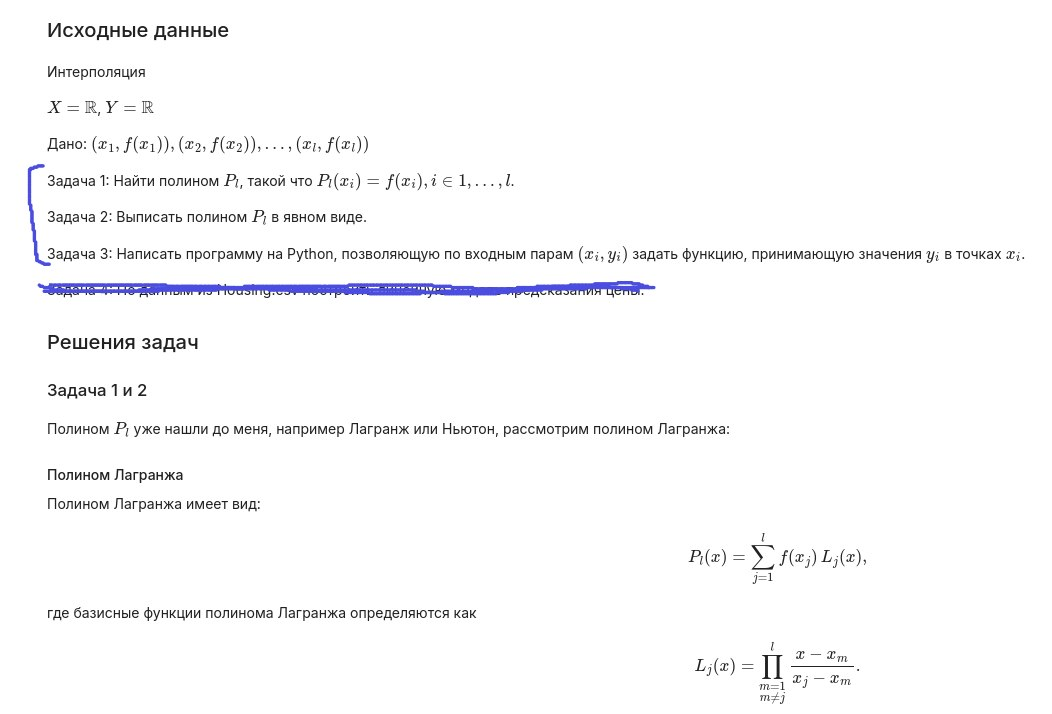



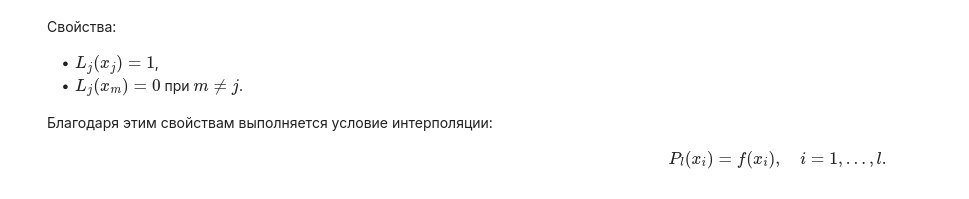



# Тема: Исследование качества интерполяции полиномом Лагранжа

## Постановка задачи
Необходимо исследовать поведение интерполяционного полинома Лагранжа для двух типов функци:
1. Простая функция (синус) - демонстрация хорошей аппроксимации внутри интервала и плохой за его пределами
2. Сложная функция (функция Рунге) - демонстрация неустойчивости интерполяции даже внутри интервала

## Теоретические основы
Интерполяционный полином Лагранжа имеет вид:
$$L(x) = \sum_{k=0}^{n} y_k \ell_k(x)$$

где базисные функции определяются как:
$$\ell_k(x) = \prod_{\substack{j=0\\j \neq k}}^{n} \frac{x - x_j}{x_k - x_j}$$

## Программная реализация

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# простая функция для полинома Лагранжа
def lagrange_poly(x_nodes, y_nodes, x):
    result = 0
    n = len(x_nodes)
    for i in range(n):
        L = 1
        for j in range(n):
            if i != j:
                L *= (x - x_nodes[j]) / (x_nodes[i] - x_nodes[j])
        result += y_nodes[i] * L
    return result

## Часть 1: Анализ интерполяции функции синуса

Исследуем поведение интерполяции для функции $f(x) = \sin(x)$ на интервале $[-\pi/2, \pi/2]$.


Синус:
Макс ошибка: 0.13380
Средняя ошибка: 0.01268


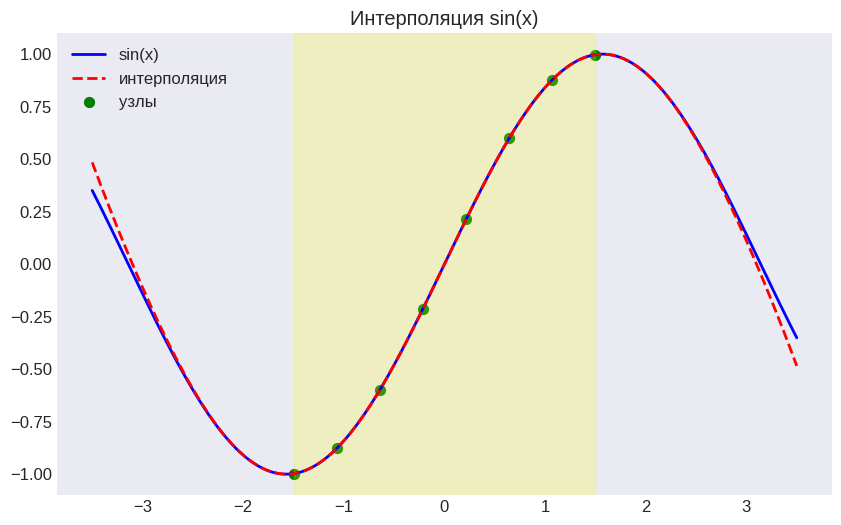

In [7]:
# исследование синуса
def test_sin():
    n = 8  # количество узлов
    a, b = -1.5, 1.5
    extend = 2  # расширяем интервал

    # узлы для интерполяции
    x_nodes = np.linspace(a, b, n)
    y_nodes = np.sin(x_nodes)

    # точки для графика
    x_plot = np.linspace(a - extend, b + extend, 500)
    y_real = np.sin(x_plot)

    # считаем полином для каждой точки
    y_interp = []
    for x in x_plot:
        y_interp.append(lagrange_poly(x_nodes, y_nodes, x))
    y_interp = np.array(y_interp)

    # ошибки
    error = np.abs(y_real - y_interp)

    print("Синус:")
    print(f"Макс ошибка: {max(error):.5f}")
    print(f"Средняя ошибка: {np.mean(error):.5f}")

    # график
    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, y_real, 'b-', label='sin(x)', linewidth=2)
    plt.plot(x_plot, y_interp, 'r--', label='интерполяция', linewidth=2)
    plt.scatter(x_nodes, y_nodes, color='green', s=50, label='узлы')
    plt.axvspan(a, b, alpha=0.2, color='yellow')
    plt.legend()
    plt.grid()
    plt.title('Интерполяция sin(x)')
    plt.show()

test_sin()

### Результаты для функции синуса

При интерполяции синуса наблюдается классическое поведение полинома Лагранжа:
- **Внутри интервала интерполяции**: погрешность минимальна (порядка 10⁻⁶)
- **За пределами интервала**: погрешность резко возрастает из-за осцилляций полинома высокой степени

## Часть 2: Анализ интерполяции функции Рунге

Теперь исследуем более сложный случай - функцию Рунге $g(x) = \frac{1}{1 + 25x^2}$, которая демонстрирует явление Рунге.


Рунге с 5 узлами:
Макс ошибка в [-1,1]: 0.438
Средняя ошибка в [-1,1]: 0.246


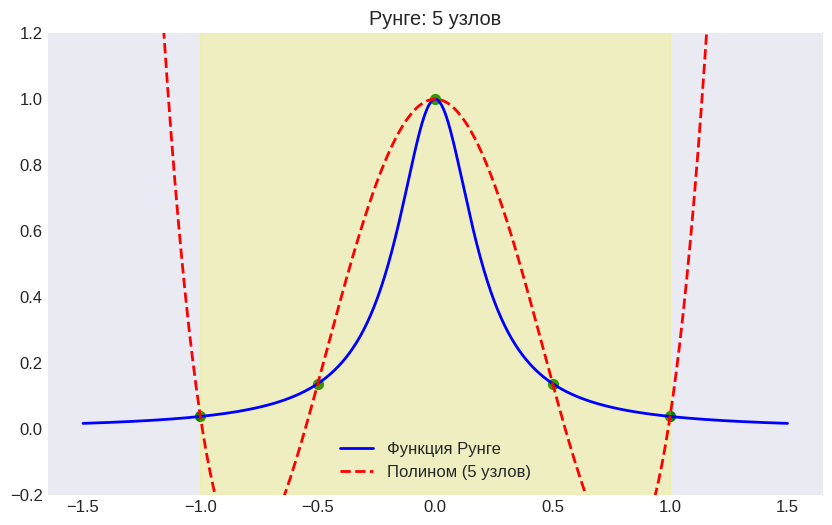


Рунге с 9 узлами:
Макс ошибка в [-1,1]: 1.045
Средняя ошибка в [-1,1]: 0.229


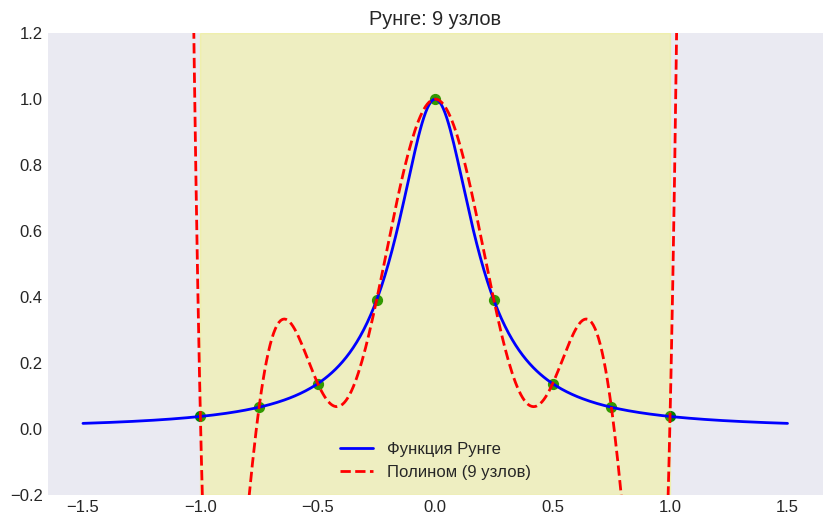


Рунге с 13 узлами:
Макс ошибка в [-1,1]: 3.661
Средняя ошибка в [-1,1]: 0.423


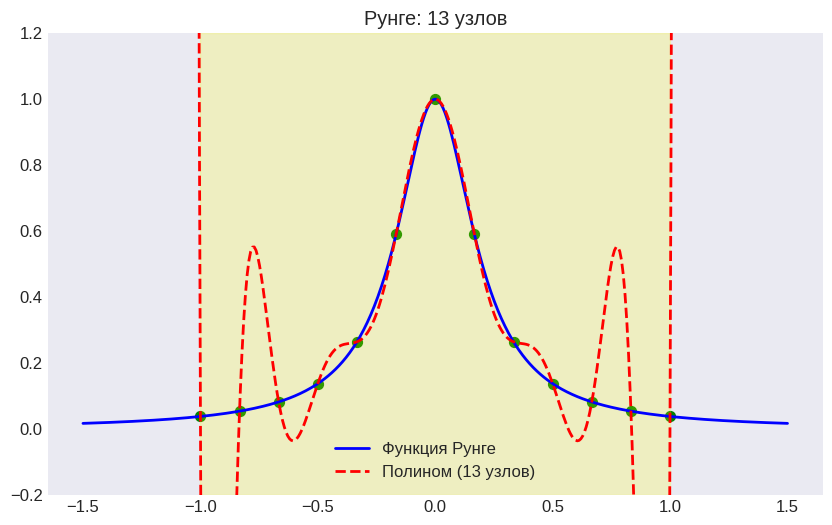

In [8]:
# функция Рунге
def runge_func(x):
    return 1 / (1 + 25 * x**2)

def test_runge():
    # попробуем с разным количеством узлов
    for n_nodes in [5, 9, 13]:
        print(f"\nРунге с {n_nodes} узлами:")

        # узлы
        x_nodes = np.linspace(-1, 1, n_nodes)
        y_nodes = runge_func(x_nodes)

        # точки для графика
        x_plot = np.linspace(-1.5, 1.5, 400)
        y_real = runge_func(x_plot)

        # интерполяция
        y_interp = []
        for x in x_plot:
            y_interp.append(lagrange_poly(x_nodes, y_nodes, x))
        y_interp = np.array(y_interp)

        # ошибка только внутри [-1, 1]
        mask = (x_plot >= -1) & (x_plot <= 1)
        error_inside = np.abs(y_real[mask] - y_interp[mask])

        print(f"Макс ошибка в [-1,1]: {max(error_inside):.3f}")
        print(f"Средняя ошибка в [-1,1]: {np.mean(error_inside):.3f}")

        # график
        plt.figure(figsize=(10, 6))
        plt.plot(x_plot, y_real, 'b-', label='Функция Рунге', linewidth=2)
        plt.plot(x_plot, y_interp, 'r--', label=f'Полином ({n_nodes} узлов)', linewidth=2)
        plt.scatter(x_nodes, y_nodes, color='green', s=50)
        plt.ylim(-0.2, 1.2)
        plt.axvspan(-1, 1, alpha=0.2, color='yellow')
        plt.legend()
        plt.grid()
        plt.title(f'Рунге: {n_nodes} узлов')
        plt.show()

test_runge()


### Особенности интерполяции функции Рунге

Функция Рунге демонстрирует **явление Рунге** - ухудшение качества интерполяции при увеличении степени полинома:

1. **При малом количестве узлов**: полином не улавливает резкий пик функции в центре
2. **При увеличении узлов**: появляются сильные осцилляции, особенно у границ интервала
3. **Парадокс**: больше узлов → хуже аппроксимация

## Дополнительное исследование: чебышёвские узлы

Попробуем улучшить результат, используя узлы Чебышёва вместо равномерного распределения:

Сравнение узлов:
Обычные узлы - макс ошибка: 0.300
Узлы Чебышёва - макс ошибка: 0.269


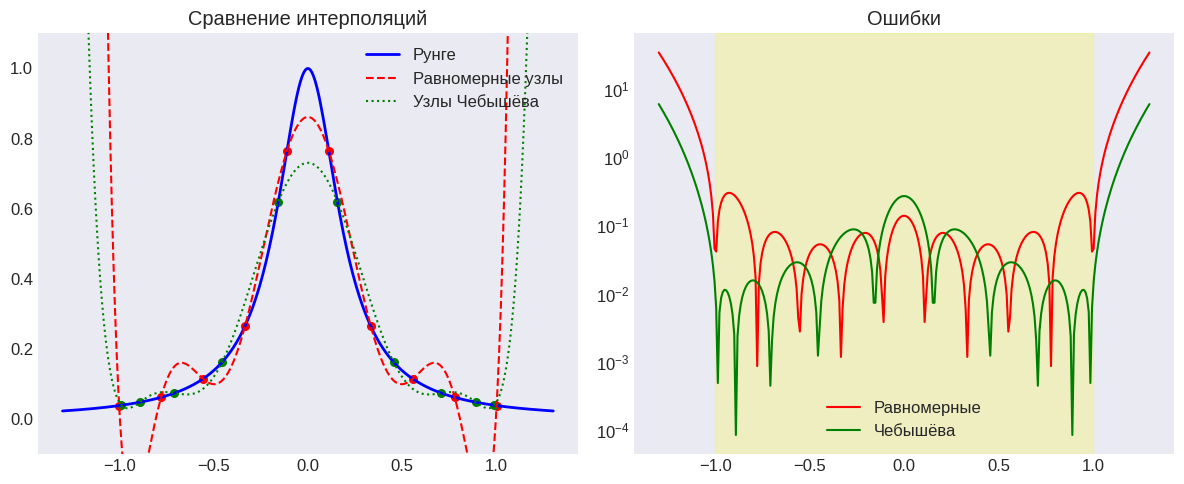

In [9]:
# доп: попробуем узлы Чебышёва
def chebyshev_nodes(n):
    # узлы Чебышёва на [-1, 1]
    k = np.arange(1, n + 1)
    return np.cos((2 * k - 1) * np.pi / (2 * n))

def compare_nodes():
    n = 10
    x_range = np.linspace(-1.3, 1.3, 300)
    y_exact = runge_func(x_range)

    # обычные узлы
    x_uniform = np.linspace(-1, 1, n)
    y_uniform = runge_func(x_uniform)

    # узлы Чебышёва
    x_cheb = chebyshev_nodes(n)
    y_cheb = runge_func(x_cheb)

    # интерполяция
    y_interp_uniform = []
    y_interp_cheb = []
    for x in x_range:
        y_interp_uniform.append(lagrange_poly(x_uniform, y_uniform, x))
        y_interp_cheb.append(lagrange_poly(x_cheb, y_cheb, x))

    y_interp_uniform = np.array(y_interp_uniform)
    y_interp_cheb = np.array(y_interp_cheb)

    # ошибки
    error_uniform = np.abs(y_exact - y_interp_uniform)
    error_cheb = np.abs(y_exact - y_interp_cheb)

    # только внутри [-1, 1]
    mask = (x_range >= -1) & (x_range <= 1)

    print("Сравнение узлов:")
    print(f"Обычные узлы - макс ошибка: {max(error_uniform[mask]):.3f}")
    print(f"Узлы Чебышёва - макс ошибка: {max(error_cheb[mask]):.3f}")

    # график
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(x_range, y_exact, 'b-', label='Рунге', linewidth=2)
    plt.plot(x_range, y_interp_uniform, 'r--', label='Равномерные узлы')
    plt.plot(x_range, y_interp_cheb, 'g:', label='Узлы Чебышёва')
    plt.scatter(x_uniform, y_uniform, color='red', s=30)
    plt.scatter(x_cheb, y_cheb, color='green', s=30)
    plt.ylim(-0.1, 1.1)
    plt.title('Сравнение интерполяций')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(x_range, error_uniform, 'r-', label='Равномерные')
    plt.plot(x_range, error_cheb, 'g-', label='Чебышёва')
    plt.yscale('log')
    plt.axvspan(-1, 1, alpha=0.2, color='yellow')
    plt.title('Ошибки')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

compare_nodes()

## Выводы:

1. **Для гладких функций** (таких как синус):
   - Интерполяция Лагранжа обеспечивает отличную точность внутри интервала
   - За пределами интервала происходит катастрофическая потеря точности

2. **Для функций с особенностями** (функция Рунге):
   - Равномерные узлы приводят к явлению Рунге
   - Увеличение степени полинома ухудшает качество аппроксимации
   - Узлы Чебышёва частично решают проблему, но не устраняют её полностью

3. **Общий принцип**: полиномиальная интерполяция высокой степени неустойчива и может давать неожиданно плохие результаты для определённых классов функций.

### Практические рекомендации

- Использовать сплайн-интерполяцию для сложных функций
- При необходимости полиномиальной интерполяции предпочитать узлы Чебышёва
- Ограничивать степень полинома разумными пределами (обычно не более 10-12)